In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [6]:
df_bmw=pd.read_csv("data/bmw_pricing_v3.csv")

## Estructura de Datos

In [7]:
df_bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        3873 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               2420 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4398 non-null   object 
 7   tipo_coche                   3383 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4357 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  1452 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [9]:
df_bmw.shape

(4843, 18)

In [8]:
df_bmw.head(5)

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,NaN,118,140411.0,100.0,2012-02-01,diesel,black,NaN,True,True,False,NaN,True,NaN,True,NaN,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,NaN,petrol,grey,convertible,True,True,False,NaN,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,NaN,False,False,False,NaN,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,NaN,diesel,red,convertible,True,True,False,NaN,True,True,True,NaN,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,NaN,diesel,silver,NaN,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [11]:
df_bmw[df_bmw.duplicated(keep=False)] # sin duplicados

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta


## EDA + Cleaning

In [17]:
df2_bmw=df_bmw.copy()

Deteccion y tratamiento de nulos

In [18]:
df2_bmw.isnull().any()

marca                           True
modelo                          True
km                              True
potencia                        True
fecha_registro                  True
tipo_gasolina                   True
color                           True
tipo_coche                      True
volante_regulable               True
aire_acondicionado              True
camara_trasera                  True
asientos_traseros_plegables     True
elevalunas_electrico            True
bluetooth                       True
gps                            False
alerta_lim_velocidad            True
precio                          True
fecha_venta                     True
dtype: bool

In [19]:
df2_bmw.isnull().sum()

marca                           970
modelo                            3
km                                2
potencia                          1
fecha_registro                 2423
tipo_gasolina                     5
color                           445
tipo_coche                     1460
volante_regulable                 4
aire_acondicionado              486
camara_trasera                    2
asientos_traseros_plegables    3391
elevalunas_electrico              2
bluetooth                       728
gps                               0
alerta_lim_velocidad            728
precio                            6
fecha_venta                       1
dtype: int64

In [20]:
for i in df2_bmw:
  if df2_bmw[i].dtype.kind == "O":
      print(i,df2_bmw[i].unique(),"\n")

marca [nan 'BMW'] 

modelo ['118' 'M4' '320' '420' '425' '335' '325' 'Z4' '120' '220' '650' '135'
 '218' '318' '430' 'M3' '330' '225' 'M235' '316' '435' '640'
 '640 Gran Coupé' '435 Gran Coupé' 'i8' '630' '430 Gran Coupé' '635' '520'
 nan '525' '530' '535' '320 Gran Turismo' '518' '116' '328' '523' 'X3'
 'M550' '528' '325 Gran Turismo' '125' '318 Gran Turismo' '420 Gran Coupé'
 'i3' '114' '520 Gran Turismo' '530 Gran Turismo' 'M135' '418 Gran Coupé'
 '330 Gran Turismo' '335 Gran Turismo' '730' '123' '535 Gran Turismo'
 '740' '750' 'ActiveHybrid 5' '735' 'M5' 'X5' 'X1' 'X4' 'X6' 'X6 M' 'X5 M'
 'X5 M50' '218 Active Tourer' '218 Gran Tourer' '216' '220 Active Tourer'
 '216 Gran Tourer' '216 Active Tourer' ' Active Tourer'
 '225 Active Tourer' '214 Gran Tourer'] 

fecha_registro ['2012-02-01' nan '2012-04-01' '2011-05-01' '2009-08-01' '2014-03-01'
 '2015-08-01' '2009-01-01' '2008-04-01' '2015-07-01' '2009-05-01'
 '2013-02-01' '2014-10-01' '1995-10-01' '2005-05-01' '2014-04-01'
 '2016-03-01

In [21]:
del(df2_bmw["marca"]) # borrar marca, se esta analizando bmw

modelo 
 modelo
320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: count, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
fecha_registro 
 fecha_registro
2013-07-01    93
2014-03-01    83
2014-05-01    81
2013-01-01    78
2013-10-01    77
              ..
2007-01-01     1
1990-03-01     1
2006-11-01     1
1994-01-01     1
2005-09-01     1
Name: count, Length: 180, dtype: int64 

tipo_gasolina 
 tipo_gasolina
diesel           4631
petrol            191
hybrid_petrol       8
Diesel              5
electro             3
Name: count, dtype: int64 

color 
 color
black     1499
grey      1070
blue       647
white      484
brown      302
silver     292
red         47
beige       37
green       14
orange       6
Name: count, dtype: int

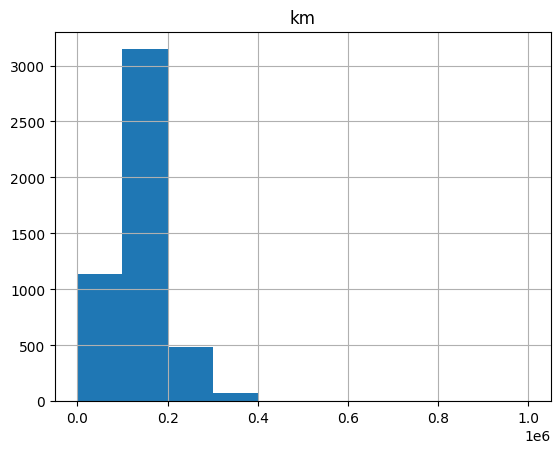

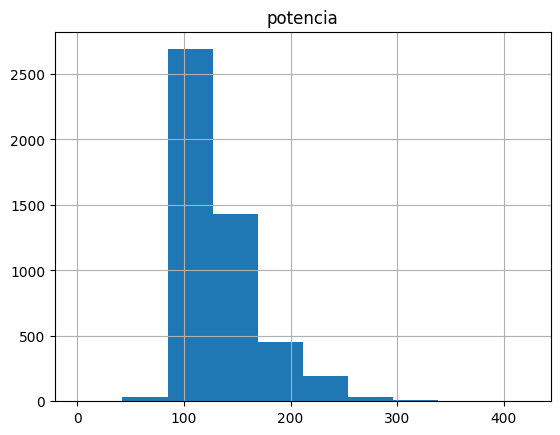

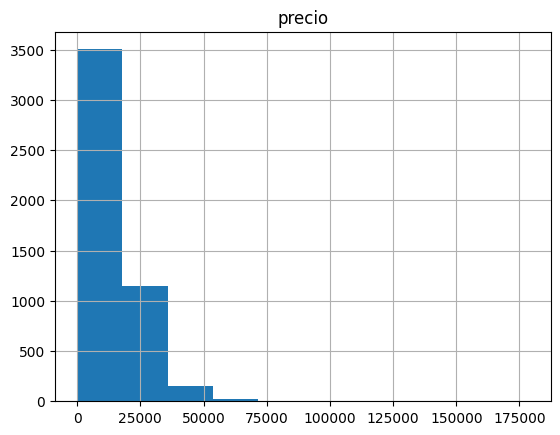

In [22]:
for i in df2_bmw:
  if df2_bmw[i].dtype.kind == "O":
    print(i,'\n', df2_bmw[i].value_counts(), '\n')
  elif (df2_bmw[i].dtype.kind=="f") or (df2_bmw[i].dtype.kind=="i"):
    print(df2_bmw.hist(i))